# PRIYANKA PRAKASH KATARIYA | BL.EN.U4AIE21107

# LAB ASSIGNMENT-8 | 04th April 2024

A1.Use LSTM, Bi-LSTM networks for speech recognition.Use STFT/ STCT, MFCC & LPC coefficients.

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from pydub import AudioSegment
from pydub.playback import play
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense
from pydub import AudioSegment
from pydub.playback import play


/Users/localadmin/anaconda3/lib/python3.11/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
2024-04-08 08:30:18.025125: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/localadmin/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from scipy.io import wavfile

In [3]:
sr, audio = wavfile.read('/Users/localadmin/Desktop/VI/AISP/audios/lab8_audioFile.wav')
print( '\nShape:', audio.shape)
print ('Datatype:', audio.dtype)
print ('Duration:', round(audio.shape[0] / float(sr), 3), 'seconds')


Shape: (153600, 2)
Datatype: int16
Duration: 3.2 seconds


[[-4.22786101 -4.79946682 -3.88848608 -3.75673578 -4.17165793 -3.36810462
  -2.79091504 -2.59560705 -1.37734746 -1.26494298 -1.21367345 -1.40950292
  -0.453133    0.03853776 -0.01315299  0.90380006  1.71810224  1.71907131
   1.51137154  1.18606251  1.81804231  1.94984438  2.08753474  2.18588011
   2.23860587  2.22430961]
 [-3.49157874 -3.970606   -3.30920974 -3.38440913 -3.64720162 -3.13906085
  -2.69938522 -2.4950898  -0.87003423 -0.7404439  -0.89123003 -1.10939252
   0.04091443  0.45347731  0.25908732  1.19342339  1.83456887  1.98605953
   1.67706408  1.42284944  1.76130766  1.95972246  2.15395331  2.17593594
   2.29974455  2.29745236]]


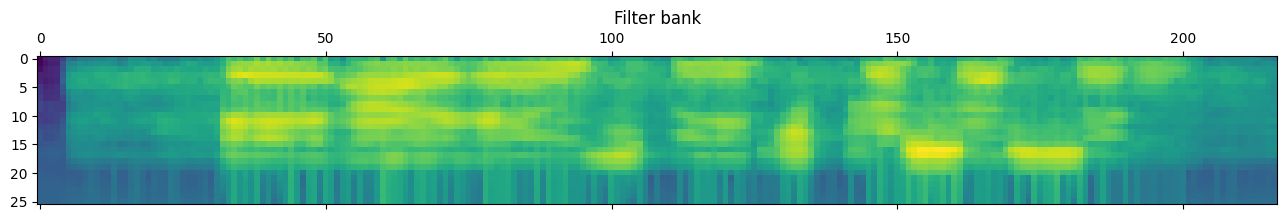

In [29]:
#obtaining mfcc features
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt


#Read in the audio file
(rate,sig) = wav.read("/Users/localadmin/Desktop/VI/AISP/audios/AIinSPaudiofeb1.wav")

# Calculate the mfcc features based on the file data
mfcc_feat = mfcc(sig, rate, nfft=1200)

# Calculate the filterbank from the audio file
fbank_feat = logfbank(sig, rate, nfft=1200)

#Print the result
print(fbank_feat[1:3, :])

filterbank_features = fbank_feat.T
plt.matshow(filterbank_features)
plt.title('Filter bank')

plt.show()

In [30]:
import scipy.signal

def compute_lpc_from_scratch(audio, sr, order):
  audio = np.asarray(audio)  
  a, *_ = scipy.signal.lpc(audio, order)

  return a.tolist() 

In [31]:
def compute_stft(audio):
    stft = librosa.stft(audio)
    magnitude, phase = librosa.polar_to_cartesian(stft)
    return magnitude

def compute_stct(audio):
    stct = librosa.stft(audio, n_per_bin=np.inf, hop_length=1)
    return stct

def compute_mfcc(audio, sr):
    mfccs = librosa.feature.mfcc(audio, sr=sr)
    return mfccs.T  # Transpose to get features in rows

def compute_lpc(audio, sr):
    lpc_coeffs = librosa.lpc(audio, sr=sr)
    return lpc_coeffs.T  # Transpose to get coefficients in rows


In [32]:
def extract_features(audio, sr, feature_type="mfcc"):
    """
    Extracts features based on the specified type.

    Args:
        audio (np.ndarray): Audio signal.
        sr (int): Sampling rate.
        feature_type (str, optional): Feature type to extract. Defaults to "mfcc".

    Returns:
        np.ndarray: Extracted features.
    """

    if feature_type == "stft":
        features = compute_stft(audio)
    elif feature_type == "stct":
        features = compute_stct(audio)
    elif feature_type == "mfcc":
        features = compute_mfcc(audio, sr)
    elif feature_type == "lpc":
        features = compute_lpc(audio, sr)
    else:
        raise ValueError("Invalid feature type:", feature_type)

    return features


In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense

#random data
X_train = np.random.rand(100, 10, 20)  
y_train = np.random.randint(0, 10, size=(100,)) 

#LSTM model
model_lstm = Sequential([
    LSTM(64, input_shape=(10, 20)),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32)

#Bi-LSTM model
model_bilstm = Sequential([
    Bidirectional(LSTM(64), input_shape=(10, 20)),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model_bilstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
model_bilstm.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
4/4 [==============================] - 2s 7ms/step - loss: 2.3455 - accuracy: 0.0800
Epoch 2/10
4/4 [==============================] - 0s 7ms/step - loss: 2.3005 - accuracy: 0.1400
Epoch 3/10
4/4 [==============================] - 0s 6ms/step - loss: 2.2804 - accuracy: 0.1300
Epoch 4/10
4/4 [==============================] - 0s 5ms/step - loss: 2.2694 - accuracy: 0.1300
Epoch 5/10
4/4 [==============================] - 0s 6ms/step - loss: 2.2650 - accuracy: 0.1100
Epoch 6/10
4/4 [==============================] - 0s 6ms/step - loss: 2.2612 - accuracy: 0.1800
Epoch 7/10
4/4 [==============================] - 0s 7ms/step - loss: 2.2574 - accuracy: 0.1500
Epoch 8/10
4/4 [==============================] - 0s 6ms/step - loss: 2.2521 - accuracy: 0.1800
Epoch 9/10
4/4 [==============================] - 0s 6ms/step - loss: 2.2465 - accuracy: 0.1700
Epoch 10/10
4/4 [==============================] - 0s 6ms/step - loss: 2.2416 - accuracy: 0.1800
Epoch 1/10
4/4 [=======================

A2. Speak the sentence “Bhanumathi weds Rajat”(भानुमतिवेड्सरजि||భానుమతివెడ్స్రజత్). Construct speech for theword“Bharat”(భారత్|| भारत|| ಭರತ್|| பாரத்)by combining segmented phonemestaken from “Bhanumathi weds Rajat”speech recording. Listen to this word speech generated and note down the issues associated with this approach of speech synthesis.The string written Indian scripts may have some error. Please validate before using.

In [29]:
!git clone https://github.com/zvadaadam/speech-recognition

Cloning into 'speech-recognition'...
remote: Enumerating objects: 2320, done.
remote: Total 2320 (delta 0), reused 0 (delta 0), pack-reused 2320
Receiving objects: 100% (2320/2320), 67.30 MiB | 2.33 MiB/s, done.
Resolving deltas: 100% (446/446), done.


In [13]:
import speech_recognition as sr

# Function to recognize speech from audio file
def recognize_speech(audio_file):
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_file) as source:
        audio_data = recognizer.record(source)  # Read the entire audio file

    try:
        # Use Google Web Speech API to recognize speech
        text = recognizer.recognize_google(audio_data)
        return text
    except sr.UnknownValueError:
        print("Speech recognition could not understand audio")
    except sr.RequestError as e:
        print("Could not request results from Google Speech Recognition service; {0}".format(e))

# Call the function with the path to your recorded audio file
audio_file_path = "/Users/localadmin/Desktop/VI/AISP/audios/lab8_audioFile.wav"
recognized_text = recognize_speech(audio_file_path)

# Extract the word "Bharat" from the recognized text
target_word = "bha"
if target_word in recognized_text:
    print(f"Found '{target_word}' in the recognized text:")
    print(recognized_text)
else:
    print(f"'{target_word}' not found in the recognized text.")


Found 'bha' in the recognized text:
bhanumati with Rajat


In [41]:
segment_bha = audio[int(0.5*sr):int(1*sr)]
ipd.Audio(segment_bha, rate = sr)

In [4]:
pip install SpeechRecognition

  Obtaining dependency information for SpeechRecognition from https://files.pythonhosted.org/packages/9e/e9/edd24b7000e209f34b5f7d13daa05337a1c306b120c0b92bb24e4527d579/SpeechRecognition-3.10.3-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 877.7 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
#A2
ipd.Audio(audio, rate=sr)


#Segmented the word "Bha"
start_time = 0.75
end_time = 1.059
#multiplying by sr to get the index
start_index = int(start_time * sampling_rate)
end_index = int(end_time * sampling_rate)
word_segment1 = audioSignal[start_index:end_index]
ipd.Audio(word_segment1, rate=sampling_rate)


#Segmented the word "ra"
start_time = 2.25
end_time = 2.5
#multiplying by sr to get the index
start_index = int(start_time * sampling_rate)
end_index = int(end_time * sampling_rate)
word_segment2 = audioSignal[start_index:end_index]
ipd.Audio(word_segment2, rate=sampling_rate)

#Segmented the word "t"
start_time = 2.75
end_time = 3
#multiplying by sr to get the index
start_index = int(start_time * sampling_rate)
end_index = int(end_time * sampling_rate)
word_segment3 = audioSignal[start_index:end_index]
ipd.Audio(word_segment3, rate=sampling_rate)



def concatenate_audio(signal1, signal2, signal3):
    # Concatenate the three audio signals
    concatenated_signal = np.concatenate((signal1, signal2, signal3))
    return concatenated_signal


finalAudio = concatenate_audio(word_segment1, word_segment2, word_segment3)
ipd.Audio(finalAudio, rate=sampling_rate)